In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter('ignore', category=FutureWarning)


The data used here is for AIDS detection. we have 4 files with different sizes so we will clean the data by the wrangle function where we will check for *null* and replace them with the mean of the values.
Then, we will combine them into one single file.

In [ ]:
df1 = pd.read_csv('AIDS_Classification.csv')
df2 = pd.read_csv('AIDS_Classification_5000.csv')
df3 = pd.read_csv('AIDS_Classification_15000.csv')
df4 = pd.read_csv('AIDS_Classification_50000.csv')


In [92]:
def wrangle(data):
    data=pd.read_csv(data)
    check=data.isnull().sum()
    print('the null values =\n' ,check)
    data.fillna(data.mean,inplace=True)
    return data


In [93]:
df1 = wrangle('AIDS_Classification.csv')


the null values =
 time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [94]:
df2 = wrangle('AIDS_Classification_5000.csv')


the null values =
 time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [95]:
df3 = wrangle('AIDS_Classification_15000.csv')


the null values =
 time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [96]:
df4 = wrangle('AIDS_Classification_50000.csv')


the null values =
 time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [10]:
# Merge all dataframes into one
df = pd.concat([df1, df2, df3, df4])

# Export merged dataframe to a file
df.to_csv('merged_data.csv', index=False)


using info function we notice that our data consists of integers and float values.

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 72139 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      72139 non-null  int64  
 1   trt       72139 non-null  int64  
 2   age       72139 non-null  int64  
 3   wtkg      72139 non-null  float64
 4   hemo      72139 non-null  int64  
 5   homo      72139 non-null  int64  
 6   drugs     72139 non-null  int64  
 7   karnof    72139 non-null  int64  
 8   oprior    72139 non-null  int64  
 9   z30       72139 non-null  int64  
 10  preanti   72139 non-null  int64  
 11  race      72139 non-null  int64  
 12  gender    72139 non-null  int64  
 13  str2      72139 non-null  int64  
 14  strat     72139 non-null  int64  
 15  symptom   72139 non-null  int64  
 16  treat     72139 non-null  int64  
 17  offtrt    72139 non-null  int64  
 18  cd40      72139 non-null  int64  
 19  cd420     72139 non-null  int64  
 20  cd80      72139 non-null  int64  

Checking for any duplicates values

In [91]:
print(f"Total number of duplicate rows: {df.duplicated().sum()}")


Total number of duplicate rows: 0


In [57]:
df.head()


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


Using matplotlib's heatmap to understand the correlation between the values.
We notice that the data is not that correlated.

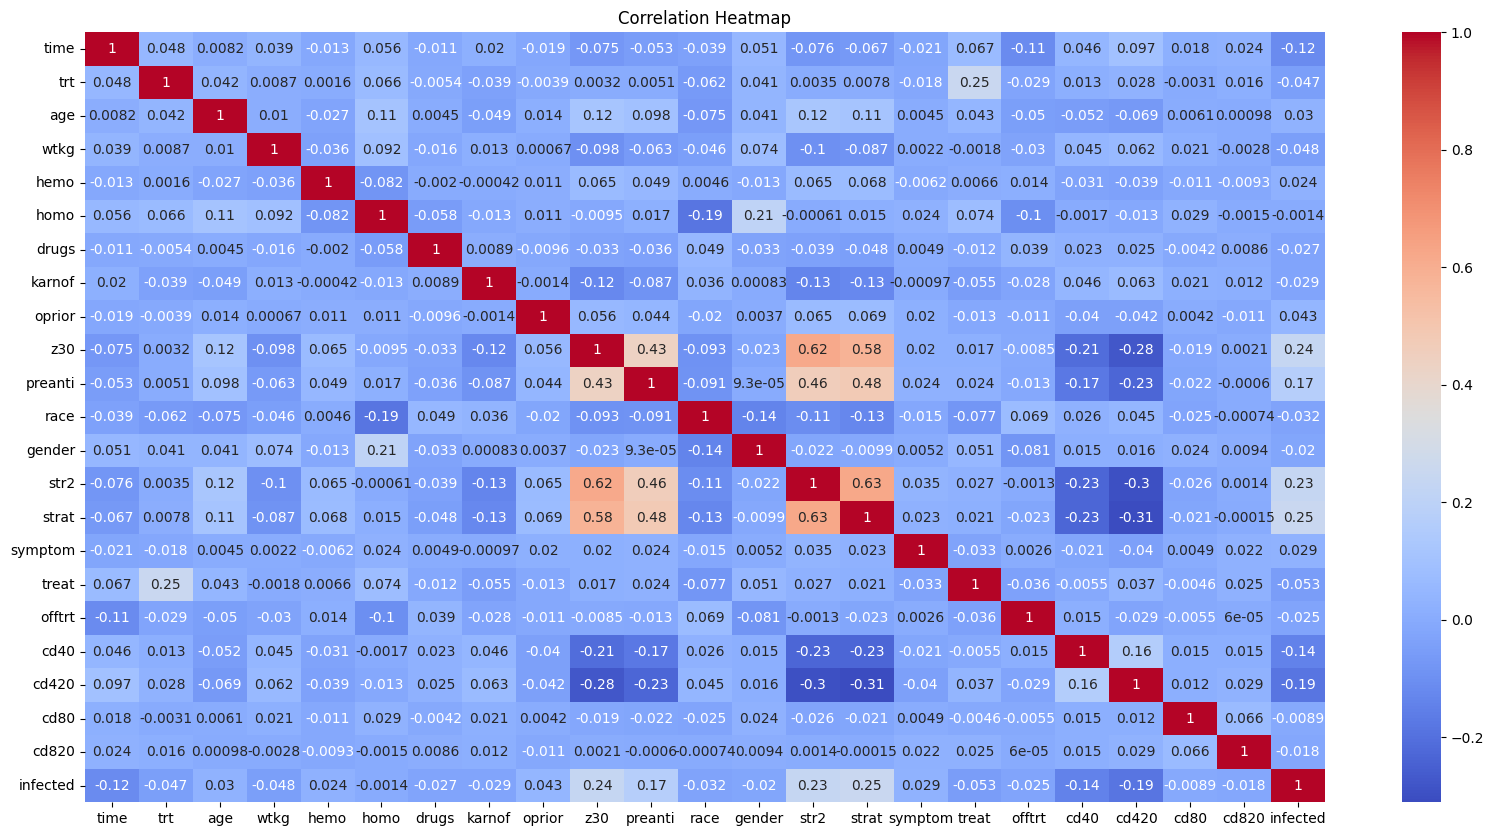

In [53]:
plt.figure(figsize=(20, 10)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Using a barplot and pie chart to better understand our target variable

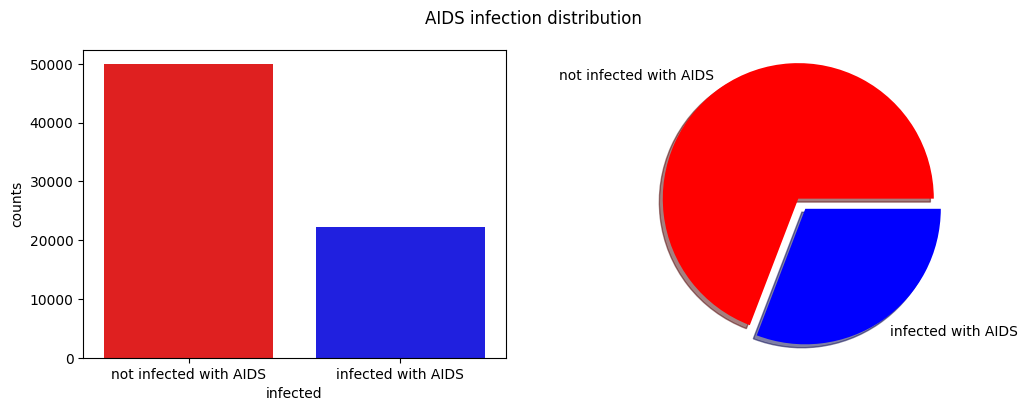

In [68]:
grouped_infect = df.groupby("infected")["infected"].count().reset_index(name="counts")
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=grouped_infect.infected, y=grouped_infect.counts, palette=["red", "blue"])
plt.xticks(ticks=(0,1), labels=["not infected with AIDS", "infected with AIDS"])
plt.subplot(1,2,2)
plt.pie(x=grouped_infect.counts, shadow=True,
        labels=["not infected with AIDS", "infected with AIDS"], colors=["red", "blue"],
        radius=1.4-0.3,  explode= [0.05,0.05])
plt.suptitle("AIDS infection distribution")
plt.show()


Corr function helps understand correlation value between variables and the target variable. sorting them shows the highest correlation is 2.47557 which is a low value.

In [69]:
df.corr()['infected'].sort_values(ascending=False)


infected    1.000000
strat       0.247557
z30         0.235942
str2        0.234536
preanti     0.174728
oprior      0.043151
age         0.030119
symptom     0.028621
hemo        0.023914
homo       -0.001416
cd80       -0.008919
cd820      -0.017689
gender     -0.020199
offtrt     -0.025446
drugs      -0.027247
karnof     -0.029347
race       -0.032233
trt        -0.046882
wtkg       -0.048424
treat      -0.052980
time       -0.115005
cd40       -0.142910
cd420      -0.186166
Name: infected, dtype: float64

#### building our ML model using two ways: directly and with a pipeline

##### Directly:

#### set target to be **infected**

In [40]:
y = df['infected']
X = df.drop('infected', axis=1)


#### we are using PCA fpr dimensionality reduction. using the variance threshold method with variance 0.95 and higher.
This equates to lambda value of *3*

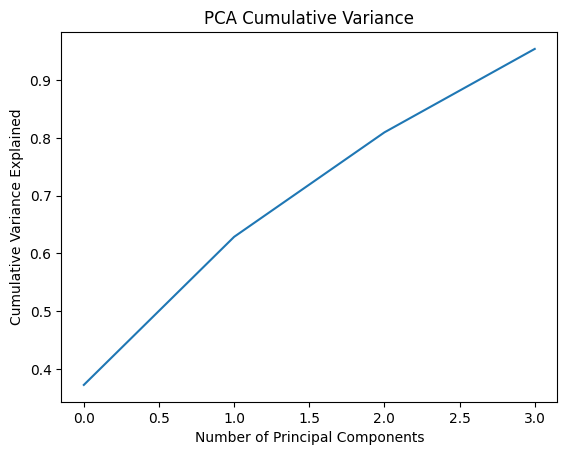

In [35]:
# Create an instance of PCA with the desired threshold
pca = PCA(n_components=0.95)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the reduced-dimensional representation
X = pca.transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA Cumulative Variance')
plt.show()


#### Test size is 20% of the data and the rest for training. SVC (short for Support Vector Classifier) works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

clf = svm.SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)


#### Final test accuracy is 69.2%

In [39]:
print('Accuracy:', accuracy)


Accuracy: 0.6923343498752426


##### Pipeline:

In [19]:
y = df['infected']
X = df.drop('infected', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50497, 22)
y_train shape: (50497,)
X_test shape: (21642, 22)
y_test shape: (21642,)


#### We create a pipeline containing the PCA and SVC then we pass the pipeline to the cross_val_score function with cv set to 5 meaning that the training data is spit into 5 subsets, and the model is trained and evaluated 5 times, each time training on 4 subsets and evaluating on the remaining subset.

the accuracy of each step =  [0.69138614 0.69217822 0.69234578 0.69422715 0.69254382]


<Axes: >

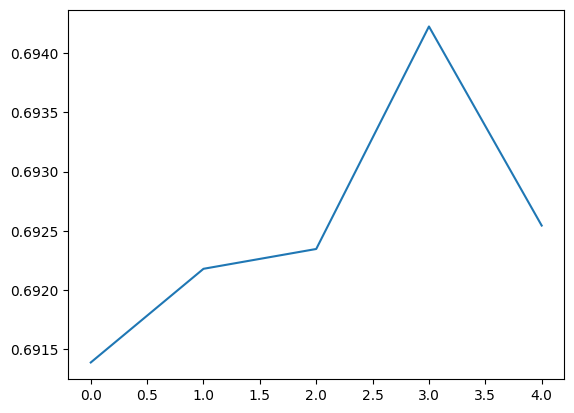

In [24]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('svm', svm.SVC())
])
cv_acc_scores = cross_val_score(pipeline,X_train,y_train,cv=5,n_jobs=-1)
print('the accuracy of each step = ',cv_acc_scores)
cv_acc_scores=pd.Series(cv_acc_scores)
cv_acc_scores.plot(kind='line')
